In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from scipy import optimize

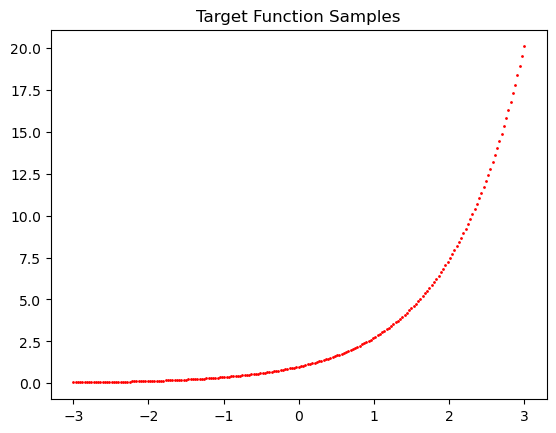

In [2]:
k: int = 201
x_grid = np.linspace(-3, 3, k)
y_grid = np.exp(x_grid)

plt.title('Target Function Samples')
plt.scatter(x_grid, y_grid, s=1.0, c='red')
plt.show()

In [3]:
def f(x: ArrayLike, a: ArrayLike) -> ArrayLike:
    return (a[0] + a[1] * x + a[2] * x**2) /\
              (1 + a[3] * x + a[4] * x**2)

Our objective is to minimize $\max_{i=1}^k \left| f(x_i) - y_i \right|$, which is not a differentiable function. While we may
resort to use first-order methods, like Nelder-Mead, we may try to approximate $\max$ function instead. Consider vector $\vec{f}(\vec{x})$:
$$ \vec{f}(\vec{x}) = \begin{bmatrix} f(x_1) \\ \dots \\ f(x_k) \end{bmatrix}. $$
Our max function will be equivalent to the following $\infty$-norm
$$ \left\| \vec{f}(\vec{x}) - \vec{y} \right\|_{\infty} = \sum_{i=1}^k \left( f(x_i) - y_i \right)^{\infty}, $$
where $\infty$ can be substituted with large enough power $p$ to create a sufficient approximation.

=====OPTIMIZATION RESULT=====
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.024145993382555225
        x: [ 1.010e+00  6.120e-01  1.136e-01 -4.146e-01  4.849e-02]
      nit: 125
      jac: [ 3.126e-08  3.225e-08  1.492e-07 -2.073e-07 -4.497e-08]
 hess_inv: [[ 1.622e-03 -1.221e-03 ... -4.755e-04  1.085e-04]
            [-1.221e-03  3.051e-03 ...  1.316e-03 -3.303e-04]
            ...
            [-4.755e-04  1.316e-03 ...  6.255e-04 -1.576e-04]
            [ 1.085e-04 -3.303e-04 ... -1.576e-04  3.990e-05]]
     nfev: 247
     njev: 247
      
Max deviation: 0.02325629348685125


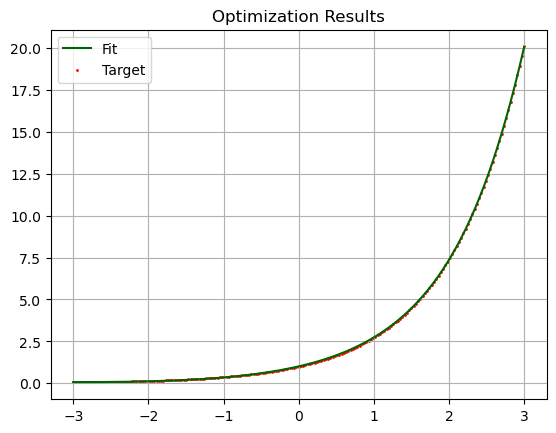

In [5]:
def loss3(a: ArrayLike)-> float:
    p: int = 50
    return (jnp.sum((f(x_grid, a) - y_grid)**p)) ** (1 / p)

a0 = np.random.normal(size=5)
res = optimize.minimize(loss3, a0, jac=jax.grad(loss3), method='BFGS')
print(f'''=====OPTIMIZATION RESULT=====\n{res}
      \nMax deviation: {np.max(f(x_grid, res.x) - y_grid)}''')

plt.title('Optimization Results')
plt.plot(x_grid, f(x_grid, res.x), color='darkgreen', label='Fit')
plt.scatter(x_grid, y_grid, s=1.0, c='red', label='Target')
plt.grid(True)
plt.legend()
plt.show()